In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('C:/Users/jkatralapalli/Desktop/Python Materials/Project 4/Glassdoor Gender Pay Gap.csv')

In [3]:
df.head()

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938
1,Software Engineer,Male,21,5,College,Management,5,108476,11128
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319


In [4]:
df.shape

(1000, 9)

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [41]:
notebook_colours=["plum","slateblue","navy","firebrick",
                                      "darksalmon","slateblue","maroon","lightskyblue","blue","darkmagenta"]

In [7]:
df.isnull()

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False


In [8]:
#checking for null values
df.isnull().sum()

JobTitle     0
Gender       0
Age          0
PerfEval     0
Education    0
Dept         0
Seniority    0
BasePay      0
Bonus        0
dtype: int64

In [10]:
#stats for all categorical data columns
df.describe(include=np.object)

,JobTitle,Gender,Education,Dept
count,1000,1000,1000,1000
unique,10,2,4,5
top,Marketing Associate,Male,High School,Operations
freq,118,532,265,210


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   JobTitle   1000 non-null   object
 1   Gender     1000 non-null   object
 2   Age        1000 non-null   int64 
 3   PerfEval   1000 non-null   int64 
 4   Education  1000 non-null   object
 5   Dept       1000 non-null   object
 6   Seniority  1000 non-null   int64 
 7   BasePay    1000 non-null   int64 
 8   Bonus      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [12]:
#Seniority and perfeval can be converted to categorical variable
df.Seniority.unique()

array([2, 5, 4, 3, 1], dtype=int64)

In [13]:
df.PerfEval.unique()

array([5, 4, 3, 2, 1], dtype=int64)

In [14]:
df['Seniority'] = df['Seniority'].astype(object)
df['PerfEval'] = df['PerfEval'].astype(object)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   JobTitle   1000 non-null   object
 1   Gender     1000 non-null   object
 2   Age        1000 non-null   int64 
 3   PerfEval   1000 non-null   object
 4   Education  1000 non-null   object
 5   Dept       1000 non-null   object
 6   Seniority  1000 non-null   object
 7   BasePay    1000 non-null   int64 
 8   Bonus      1000 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 70.4+ KB


In [16]:
#total pay is base plus bonus
df['TotalPay'] = df['BasePay']+df['Bonus']

In [17]:
df.head()

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus,TotalPay
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938,52301
1,Software Engineer,Male,21,5,College,Management,5,108476,11128,119604
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268,99476
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154,118234
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319,108783


In [18]:
df.describe()

,Age,BasePay,Bonus,TotalPay
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,41.393000,94472.653000,6467.161000,100939.814000
std,14.294856,25337.493272,2004.377365,25156.599655
min,18.000000,34208.000000,1703.000000,40828.000000
25%,29.000000,76850.250000,4849.500000,83443.000000
50%,41.000000,93327.500000,6507.000000,100047.000000
75%,54.250000,111558.000000,8026.000000,117656.000000
max,65.000000,179726.000000,11293.000000,184010.000000


In [19]:
#labels for age buckets between 18 and 65
labels = ['18-30', '31 - 42', '43 - 54', '55 - 65']

In [20]:
bins = [17, 30, 42, 54, 65]

In [21]:
AgeBinned = pd.cut(df['Age'], bins = bins, labels = labels)
AgeBinned.tail()

995    55 - 65
996    55 - 65
997    43 - 54
998    55 - 65
999    55 - 65
Name: Age, dtype: category
Categories (4, object): ['18-30' < '31 - 42' < '43 - 54' < '55 - 65']

In [22]:
df['AgeBuckets'] = AgeBinned
df['AgeBuckets'] = df['AgeBuckets'].astype(object)
df.head()

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus,TotalPay,AgeBuckets
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938,52301,18-30
1,Software Engineer,Male,21,5,College,Management,5,108476,11128,119604,18-30
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268,99476,18-30
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154,118234,18-30
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319,108783,18-30


In [23]:
df.describe(include=np.object)

,JobTitle,Gender,PerfEval,Education,Dept,Seniority,AgeBuckets
count,1000,1000,1000,1000,1000,1000,1000
unique,10,2,5,4,5,5,4
top,Marketing Associate,Male,5,High School,Operations,3,18-30
freq,118,532,209,265,210,219,284


In [35]:
#understand spread of data in each variable, creating univariate distribution plots
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
import plotly.express as px
%matplotlib inline
import plotly.graph_objects as go
from plotly import __version__
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
cf.go_offline()

In [44]:
iplot(cf.subplots([df['Gender'].figure(kind='hist', color = notebook_colours[0]), 
                   df['AgeBuckets'].figure(kind='hist',color=notebook_colours[1]),
                  df['Seniority'].figure(kind='hist',color=notebook_colours[2]),
                  df['Education'].figure(kind='hist',color=notebook_colours[3]),
                  df['Dept'].figure(kind='hist',color=notebook_colours[4]),
                  df['PerfEval'].figure(kind='hist',color=notebook_colours[5]),
                  df['JobTitle'].figure(kind='hist',color=notebook_colours[6])], shape=(3,3)))

In [45]:
#to analyze distribution and uniformity
iplot(cf.subplots([df['BasePay'].figure(kind='hist', color=notebook_colours[7]),
                  df['Bonus'].figure(kind='hist', color=notebook_colours[8]),
                  df['TotalPay'].figure(kind='hist', color=notebook_colours[6])], shape=(3,1)))

In [46]:
## Gender Diversity Across Different Attributes
bivar=['JobTitle','PerfEval', 'Dept', 'AgeBuckets','Seniority', 'Education']
for i in bivar:
    fig=px.histogram(df, x=i, color='Gender',color_discrete_sequence=notebook_colours, barmode = 'group',
                     title='Gender Diversity Across {}'.format(i))
    fig.show()

In [47]:
## Jobs and Education trends
px.histogram(df,x="JobTitle",color="Education",barmode="stack", color_discrete_sequence=notebook_colours)

In [50]:
## Dept and Education trends
px.histogram(df,x="Dept",color="Education",barmode="stack", color_discrete_sequence=notebook_colours)

In [51]:
#Salary and Department 
px.histogram(df, x="Dept", y="BasePay", color="JobTitle", barmode="group",
            histfunc='avg', title="Base Pay in Different Departments", color_discrete_sequence=(notebook_colours))

In [52]:
px.histogram(df, x="Dept", y="Bonus", color="JobTitle", barmode="group",
            histfunc='avg', title="Bonus in Different Departments", color_discrete_sequence=(notebook_colours))

In [53]:
px.histogram(df, x="Dept", y="TotalPay", color="JobTitle", barmode="stack",
            histfunc='avg', title="Total Pay in Different Departments", color_discrete_sequence=(notebook_colours))

In [54]:
#Relationship between components of pay
px.scatter(df, x="BasePay", y="Bonus", trendline="ols", color="Gender",
          facet_col="Dept", color_discrete_sequence=notebook_colours)

In [55]:
#Pay at different seniority levels
#reshape data into matrix for a heatmap
SeniorityPivot=df.pivot_table(index='Seniority', columns='JobTitle',values='TotalPay')
SeniorityPivot.head()


JobTitle,Data Scientist,Driver,Financial Analyst,Graphic Designer,IT,Manager,Marketing Associate,Sales Associate,Software Engineer,Warehouse Associate
Seniority,,,,,,,,,,
1,82975.833333,78568.333333,87960.380952,78929.105263,72452.809524,116059.894737,63856.280000,78134.117647,94399.296296,73525.375000
2,92076.037037,88842.000000,85220.681818,80562.562500,89543.000000,123001.842105,68704.950000,92354.631579,100849.473684,87242.190476
3,97144.222222,93116.117647,101846.772727,94316.823529,97644.440000,132496.450000,84659.928571,101897.269231,115787.400000,97562.294118
4,103730.333333,106887.428571,111726.000000,108984.518519,106599.000000,143539.066667,92665.800000,107962.214286,115895.000000,110881.000000
5,118999.739130,112144.076923,123916.250000,117762.210526,127183.750000,145888.705882,101322.666667,118068.666667,136869.545455,113675.368421


<AxesSubplot:xlabel='JobTitle', ylabel='Seniority'>

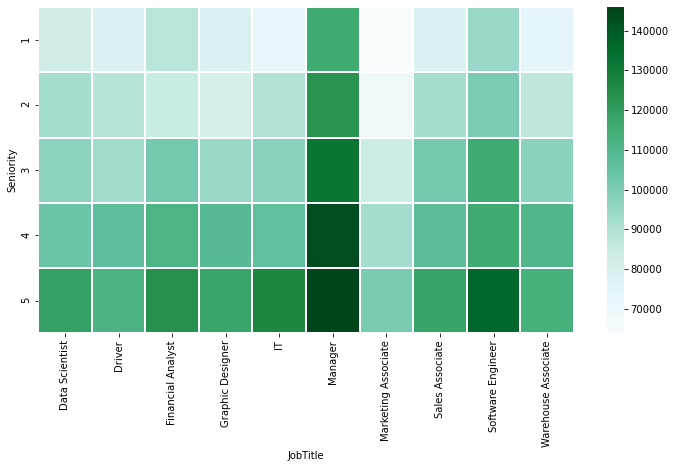

In [61]:
plt.figure(figsize=(12,6))
sns.heatmap(SeniorityPivot,linewidths=1,linecolor='white',cmap="BuGn")

In [62]:
##Analysis of pay disparity in females
#1 Pay gap by dept
px.box(df, x="Dept", y="TotalPay", color="Gender", color_discrete_sequence=notebook_colours)

In [69]:
#Average pay across department and gender
GenderDeptPay=df.groupby(['Dept','Gender'],axis=0,as_index=False).mean()
GenderDeptPay

,Dept,Gender,Age,BasePay,Bonus,TotalPay
0,Administration,Female,41.263158,87071.873684,6357.284211,93429.157895
1,Administration,Male,40.438776,96170.744898,6509.530612,102680.275510
2,Engineering,Female,42.606742,90774.955056,6533.157303,97308.112360
3,Engineering,Male,38.786408,101433.000000,6975.475728,108408.475728
4,Management,Female,41.517241,92679.011494,6493.114943,99172.126437
5,Management,Male,41.027027,99482.297297,6719.018018,106201.315315
6,Operations,Female,41.135417,86456.156250,6642.312500,93098.468750
7,Operations,Male,41.692982,93118.438596,6096.289474,99214.728070
8,Sales,Female,42.603960,92867.079208,6355.267327,99222.346535
9,Sales,Male,42.943396,102349.481132,6038.933962,108388.415094


In [71]:
GenderDeptPay2=GenderDeptPay.pivot(index='Dept', columns='Gender',values=['BasePay','Bonus','TotalPay'])
GenderDeptPay2

BasePay                       Bonus               \
Gender                Female           Male       Female         Male   
Dept                                                                    
Administration  87071.873684   96170.744898  6357.284211  6509.530612   
Engineering     90774.955056  101433.000000  6533.157303  6975.475728   
Management      92679.011494   99482.297297  6493.114943  6719.018018   
Operations      86456.156250   93118.438596  6642.312500  6096.289474   
Sales           92867.079208  102349.481132  6355.267327  6038.933962   

                    TotalPay                 
Gender                Female           Male  
Dept                                         
Administration  93429.157895  102680.275510  
Engineering     97308.112360  108408.475728  
Management      99172.126437  106201.315315  
Operations      93098.468750   99214.728070  
Sales           99222.346535  108388.415094

In [72]:
GenderDeptPay2['DeptPayGap']=GenderDeptPay2['TotalPay','Male']-GenderDeptPay2['TotalPay','Female']
GenderDeptPay2

BasePay                       Bonus               \
Gender                Female           Male       Female         Male   
Dept                                                                    
Administration  87071.873684   96170.744898  6357.284211  6509.530612   
Engineering     90774.955056  101433.000000  6533.157303  6975.475728   
Management      92679.011494   99482.297297  6493.114943  6719.018018   
Operations      86456.156250   93118.438596  6642.312500  6096.289474   
Sales           92867.079208  102349.481132  6355.267327  6038.933962   

                    TotalPay                   DeptPayGap  
Gender                Female           Male                
Dept                                                       
Administration  93429.157895  102680.275510   9251.117615  
Engineering     97308.112360  108408.475728  11100.363369  
Management      99172.126437  106201.315315   7029.188879  
Operations      93098.468750   99214.728070   6116.259320  
Sales           99222.346535  108388.415094   9166.068560

In [75]:
#2 Pay Gap by Job titles within Departments
GenderDeptJobTitle=df.groupby(['Dept','JobTitle','Gender'],axis=0,as_index=False).mean()
GenderDeptJobTitle


,Dept,JobTitle,Gender,Age,BasePay,Bonus,TotalPay
0,Administration,Data Scientist,Female,42.300000,98355.600000,6424.700000,104780.300000
1,Administration,Data Scientist,Male,40.000000,93293.666667,6660.866667,99954.533333
2,Administration,Driver,Female,36.375000,76746.375000,7011.000000,83757.375000
3,Administration,Driver,Male,44.000000,96446.666667,6182.555556,102629.222222
4,Administration,Financial Analyst,Female,35.642857,94653.000000,6911.642857,101564.642857
...,...,...,...,...,...,...,...
94,Sales,Sales Associate,Male,43.833333,100224.500000,6408.500000,106633.000000
95,Sales,Software Engineer,Female,41.000000,86675.000000,7947.000000,94622.000000
96,Sales,Software Engineer,Male,46.000000,112011.142857,5631.428571,117642.571429
97,Sales,Warehouse Associate,Female,33.285714,81483.571429,7773.714286,89257.285714


In [103]:
#Treemap for Job Title+Gender
fig=px.treemap(GenderDeptJobTitle,path=['Dept','JobTitle','Gender'],values='TotalPay', color='TotalPay',
               color_continuous_scale='mint',title="Gender Pay Gap by Job Title in Departments",
               labels={"TotalPay":'Average Total Pay'},width=1200, height=600)
fig

In [106]:
#3 Pay Gap by Seniority
GenderSeniorityDeptPay=df.groupby(['Dept','Seniority','Gender'], axis=0,as_index=False).mean()
GenderSeniorityDeptPay.head()

,Dept,Seniority,Gender,Age,BasePay,Bonus,TotalPay
0,Administration,1,Female,45.526316,68886.210526,5321.526316,74207.736842
1,Administration,1,Male,35.263158,77124.789474,6917.736842,84042.526316
2,Administration,2,Female,40.850000,72076.450000,5840.650000,77917.100000
3,Administration,2,Male,41.562500,85914.312500,5511.125000,91425.437500
4,Administration,3,Female,43.333333,91691.733333,6154.200000,97845.933333


In [109]:
fig=px.scatter(GenderSeniorityDeptPay,'Seniority','TotalPay',color='Gender',size=(GenderSeniorityDeptPay['TotalPay']/10000)-6,
              color_discrete_sequence=notebook_colours, facet_col='Dept',labels={"TotalPay":'Average Total Pay'})
fig.show()

In [110]:
#4 Wage gap and performance evaluation
px.box(df,x='Dept', y='PerfEval',color='Gender', color_discrete_sequence=notebook_colours,
      title="Wage Gap with respect to Performance Evaluation in Each Department")

In [112]:
GenderPerfEvalPay=df.groupby(['Dept','PerfEval','Gender'],axis=0,as_index=False).mean()
GenderPerfEvalPay.head()

,Dept,PerfEval,Gender,Age,BasePay,Bonus,TotalPay
0,Administration,1,Female,47.681818,90121.863636,3702.909091,93824.772727
1,Administration,1,Male,46.235294,102141.941176,3810.705882,105952.647059
2,Administration,2,Female,41.736842,87118.526316,5314.526316,92433.052632
3,Administration,2,Male,39.380952,97423.904762,5427.238095,102851.142857
4,Administration,3,Female,42.000000,80919.562500,6240.562500,87160.125000


In [123]:
px.scatter(GenderPerfEvalPay,x="Dept",y="TotalPay",color="Gender",
          color_discrete_sequence=notebook_colours, facet_col='PerfEval',
          size=(GenderPerfEvalPay['BasePay']/10000)-8)

In [127]:
#5 Wage Gap with respect to educational backgrounds
GenderEducationPay=df.groupby(['Dept','Education','Gender'],axis=0,as_index=False).mean()
GenderEducationPay.head(5)

,Dept,Education,Gender,Age,BasePay,Bonus,TotalPay
0,Administration,College,Female,42.571429,85577.892857,6335.214286,91913.107143
1,Administration,College,Male,38.875000,96858.750000,6812.458333,103671.208333
2,Administration,High School,Female,42.200000,87103.640000,5429.320000,92532.960000
3,Administration,High School,Male,41.681818,90553.090909,5768.909091,96322.000000
4,Administration,Masters,Female,39.925926,89867.296296,6803.222222,96670.518519


In [129]:
fig=px.sunburst(GenderEducationPay,path=['Dept','Education','Gender'],values='TotalPay',
               color='TotalPay', color_continuous_scale='bugn',title='Wage Gap with respect to Education',
               labels={"TotalPay":'Average Total Pay'})
fig.show()